<a href="https://colab.research.google.com/github/rufimelo99/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np

import sklearn.decomposition
import matplotlib.pyplot as plt

# Feed-Forward Networks

## Dataset

***MNIST Dataset***

70000 Examples:

**Splited**:

* 60000 for training;

* 10000 for tests;


**10 Classes**: 

* 0, ..., 9

**Features**

* (28,28,1)

In [ ]:
mnist_data, mnist_info = tfds.load('mnist', with_info=True)
#print(mnist_data)
#print(mnist_info)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


It is needed to convert into numpy arrays and normalize the images. Each pixel range from 0 to 255.0, so:

`pixels = pixels/255.0`

In [ ]:
mnist_x = np.asarray([instance['image'] for instance in tfds.as_numpy(mnist_data['train'])])
mnist_y = np.asarray([instance['label'] for instance in tfds.as_numpy(mnist_data['train'])])
mnist_x= mnist_x/255.0

**Example of visualizing data:**

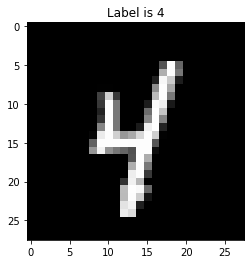

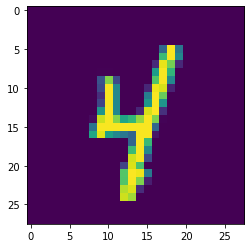

In [ ]:
def showImage(label,pixels):
  #remove the normalization
  pixels = pixels*255.0

  # Make those columns into a array of 8-bits pixels
  # This array will be of 1D with length 784
  # The pixel intensity values are integers from 0 to 255
  pixels = np.array(pixels, dtype='uint8')

  # Reshape the array into 28 x 28 array (2-dimensional array)
  pixels = pixels.reshape((28, 28))

  # Plot
  plt.title('Label is {label}'.format(label=label))
  plt.imshow(pixels, cmap='gray')
  plt.show()

showImage(mnist_y[0], mnist_x[0] )

#or this
plt.imshow(mnist_x[0].reshape(28,28))


We will start by creating a very simple network without hidden layers.

We'll use the softmax

Additionally, we request the accuracy values. To update the weights, we will use Stochastic Gradient Descent.

In [ ]:
#print(mnist_info.features['image'].shape)
#print(mnist_x.shape)
#print(mnist_y.shape)

single_layer_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])


In [ ]:
single_layer_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
single_layer_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
output (Dense)               (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
single_layer_model.save_weights('single_layer_init.h5')

In [ ]:
single_layer_train = single_layer_model.fit(mnist_x, mnist_y, epochs=100, batch_size=32)

Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1464 - accuracy: 0.7022
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4764 - accuracy: 0.8777
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4130 - accuracy: 0.8892
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3765 - accuracy: 0.8978
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3643 - accuracy: 0.9009
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3541 - accuracy: 0.9017
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3420 - accuracy: 0.9043
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3295 - accuracy: 0.9073
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3258 - accuracy: 0.9076
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - l

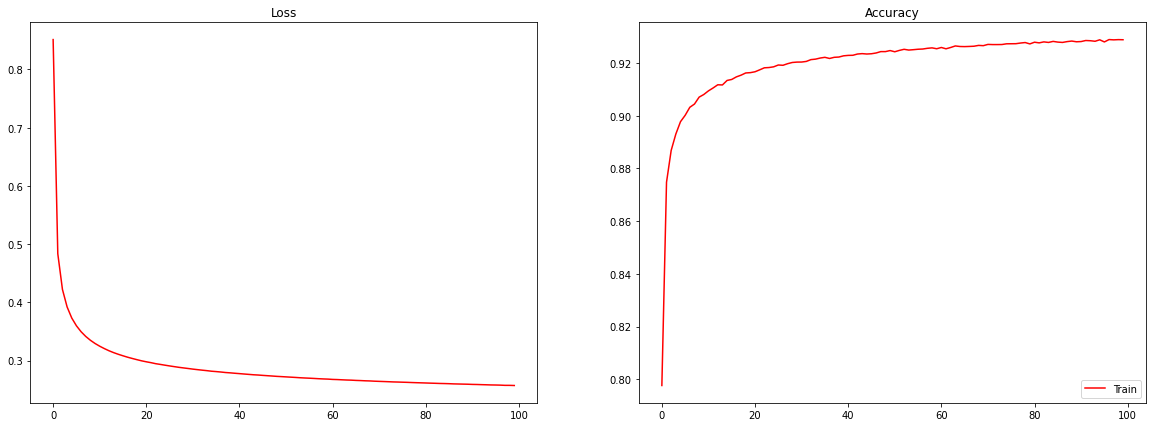

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(single_layer_train.history['loss'], '-r', label='Train')

acc_ax.set_title('Accuracy')
acc_ax.plot(single_layer_train.history['accuracy'], '-r', label='Train')

plt.legend(loc=4)
plt.show()

In [ ]:
predictions = single_layer_model.predict(mnist_x[:5])
print(predictions)
np.argmax(predictions, axis=1)

[[9.6974591e-06 1.9755035e-03 6.5324933e-04 2.7393745e-04 9.6097839e-01
  4.9377279e-03 9.6238889e-03 5.8178295e-04 1.2882602e-02 8.0831088e-03]
 [4.3804553e-07 9.4114238e-01 3.3229860e-03 4.0952084e-03 2.4276903e-04
  1.4167618e-04 4.1380794e-05 4.7536906e-02 2.2229024e-03 1.2533524e-03]
 [9.9942136e-01 1.5339546e-13 2.3813365e-05 1.8157350e-05 1.2075019e-08
  3.0735295e-04 2.2286379e-04 1.5234259e-09 6.4653727e-06 1.2336598e-07]
 [1.0875975e-05 1.6944592e-13 1.6724290e-06 1.7367572e-06 1.3772312e-07
  2.7684885e-06 4.6083448e-10 9.9983191e-01 1.3712543e-06 1.4954359e-04]
 [1.5095135e-04 5.9341022e-07 3.8771268e-03 2.7431112e-02 3.6913207e-05
  9.8165935e-03 3.2933815e-06 1.1717761e-05 9.5794725e-01 7.2446489e-04]]


array([4, 1, 0, 7, 8])

In [ ]:
loss, acc = single_layer_model.evaluate(mnist_x, mnist_y)
print('Accuracy: {}'.format(acc))

1875/1875 [==============================] - 2s 983us/step - loss: 0.2625 - accuracy: 0.9276
Accuracy: 0.9275500178337097


In [ ]:
single_layer_model.load_weights('single_layer_init.h5')

In [ ]:
single_layer_train = single_layer_model.fit(mnist_x, mnist_y, validation_split=0.2, epochs=100, batch_size=32)

Epoch 1/100
1500/1500 [==============================] - 2s 2ms/step - loss: 0.8512 - accuracy: 0.7976 - val_loss: 0.5448 - val_accuracy: 0.8646
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4835 - accuracy: 0.8748 - val_loss: 0.4478 - val_accuracy: 0.8837
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4221 - accuracy: 0.8868 - val_loss: 0.4091 - val_accuracy: 0.8914
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3921 - accuracy: 0.8930 - val_loss: 0.3868 - val_accuracy: 0.8947
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3730 - accuracy: 0.8977 - val_loss: 0.3721 - val_accuracy: 0.8978
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3597 - accuracy: 0.9001 - val_loss: 0.3613 - val_accuracy: 0.9006
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3495 - accuracy: 0.9032 - val_loss: 0.3531 - val_ac

In [ ]:
mnist_test_x = np.asarray([instance['image'] for instance in tfds.as_numpy(mnist_data['test'])])
mnist_test_y = np.asarray([instance['label'] for instance in tfds.as_numpy(mnist_data['test'])])
mnist_test_x= mnist_test_x/255.0

In [ ]:
predictions=single_layer_model.predict(mnist_test_x)
predictedClasses = np.argmax(predictions, axis=1)
from sklearn.metrics import accuracy_score
print(accuracy_score(mnist_test_y, predictedClasses))
loss, acc = single_layer_model.evaluate(mnist_x, mnist_y)
print('Accuracy for the training set: {}'.format(acc))

loss, acc = single_layer_model.evaluate(mnist_test_x, mnist_test_y)
print('Accuracy for the testing set: {}'.format(acc))

0.9238
1875/1875 [==============================] - 2s 964us/step - loss: 0.2625 - accuracy: 0.9276
Accuracy for the training set: 0.9275500178337097
313/313 [==============================] - 0s 1ms/step - loss: 0.2692 - accuracy: 0.9238
Accuracy for the testing set: 0.923799991607666


Predicted Label:  2
Actual Label:  2


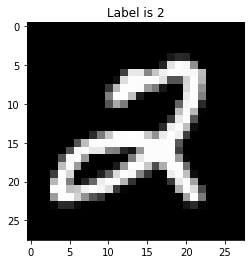

In [ ]:
#Example
for i in range(1):
  print("Predicted Label: " , predictedClasses[i])
  print("Actual Label: " , mnist_test_y[i])
  showImage(mnist_test_y[i],mnist_test_x[i] )
  i=i+1

## Multi-Layer Model

In [ ]:

multi_layer_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(200, activation='tanh', name='hidden'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 200)               157000    
_________________________________________________________________
output (Dense)               (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_best.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

In [ ]:
multi_layer_train = multi_layer_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0785 - val_accuracy: 0.9782

Epoch 00001: val_accuracy improved from -inf to 0.97817, saving model to multi_layer_best.h5
Epoch 2/10000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0785 - val_accuracy: 0.9782

Epoch 00002: val_accuracy did not improve from 0.97817
Epoch 3/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0787 - val_accuracy: 0.9782

Epoch 00003: val_accuracy did not improve from 0.97817
Epoch 4/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0786 - val_accuracy: 0.9780

Epoch 00004: val_accuracy did not improve from 0.97817
Epoch 5/10000
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0785 - val_accuracy: 0.9778

Ep

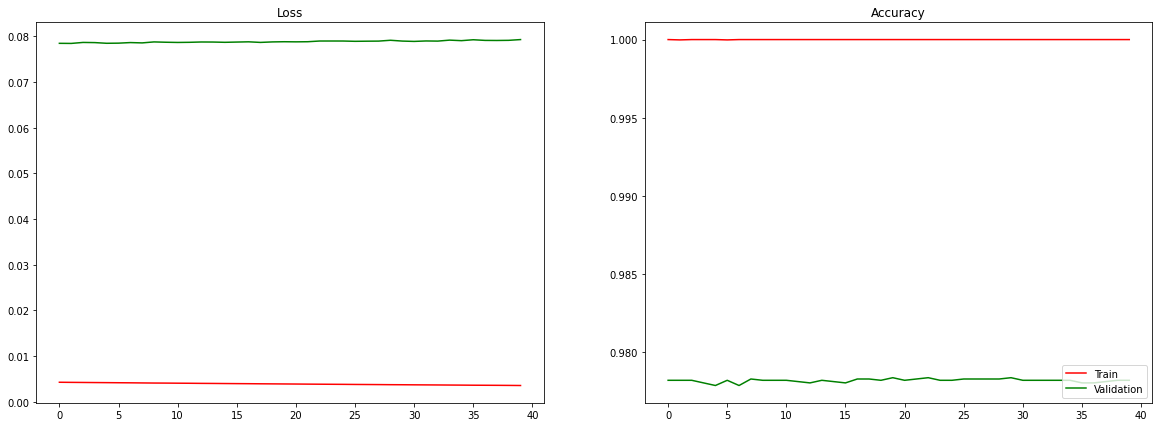

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show()

Regularization


In [ ]:

multi_layer_reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(name='multi_layer', input_shape=(28,28)),
    tf.keras.layers.Dense(200, activation='tanh',  kernel_regularizer=tf.keras.regularizers.l2(0.01), name='hidden'),
    tf.keras.layers.Dense(mnist_info.features['label'].num_classes, activation='softmax', name='output')
])

multi_layer_reg_model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
multi_layer_reg_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
multi_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden (Dense)               (None, 200)               157000    
_________________________________________________________________
output (Dense)               (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint('multi_layer_reg_best.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

multi_layer_reg_train = multi_layer_reg_model.fit(mnist_x, mnist_y, validation_split=0.2, callbacks=[earlystop,checkpoint], epochs=10000, batch_size=32)

Epoch 1/10000
1500/1500 [==============================] - 5s 3ms/step - loss: 3.7751 - accuracy: 0.7441 - val_loss: 2.2487 - val_accuracy: 0.8889

Epoch 00001: val_accuracy improved from -inf to 0.88892, saving model to multi_layer_reg_best.h5
Epoch 2/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 2.0021 - accuracy: 0.8910 - val_loss: 1.4216 - val_accuracy: 0.8994

Epoch 00002: val_accuracy improved from 0.88892 to 0.89942, saving model to multi_layer_reg_best.h5
Epoch 3/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 1.2764 - accuracy: 0.9048 - val_loss: 0.9707 - val_accuracy: 0.9068

Epoch 00003: val_accuracy improved from 0.89942 to 0.90675, saving model to multi_layer_reg_best.h5
Epoch 4/10000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8930 - accuracy: 0.9045 - val_loss: 0.7242 - val_accuracy: 0.9079

Epoch 00004: val_accuracy improved from 0.90675 to 0.90792, saving model to multi_layer_reg_best.h5
Epoch 5/100

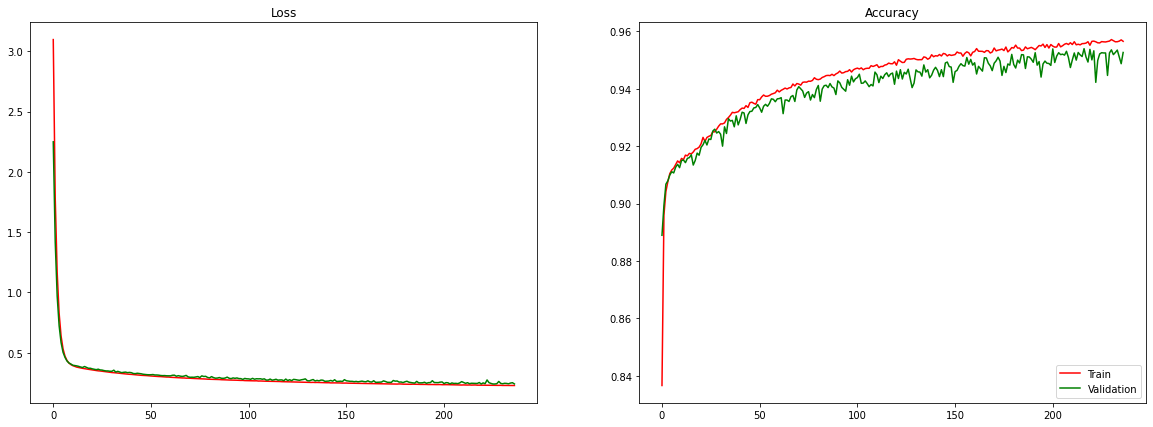

In [ ]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))

loss_ax.set_title('Loss')
loss_ax.plot(multi_layer_reg_train.history['loss'], '-r', label='Train')
loss_ax.plot(multi_layer_reg_train.history['val_loss'], '-g', label='Validation')

acc_ax.set_title('Accuracy')
acc_ax.plot(multi_layer_reg_train.history['accuracy'], '-r', label='Train')
acc_ax.plot(multi_layer_reg_train.history['val_accuracy'], '-g', label='Validation')

plt.legend(loc=4)
plt.show()